In [205]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [206]:
kidney=pd.read_excel("kidney_disease.xlsx")

In [207]:
kidney

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [142]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

EDA

<Axes: >

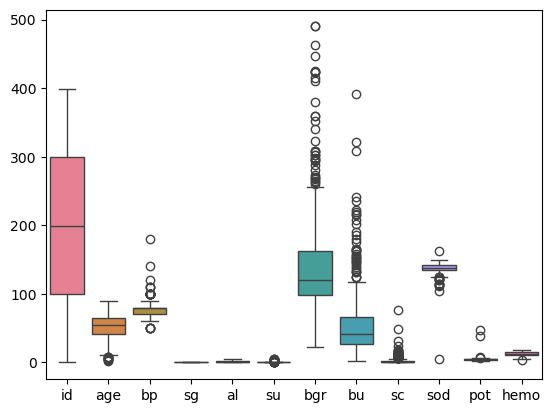

In [143]:
#univariant analysis
sns.boxplot(kidney)

<Axes: xlabel='count', ylabel='rbc'>

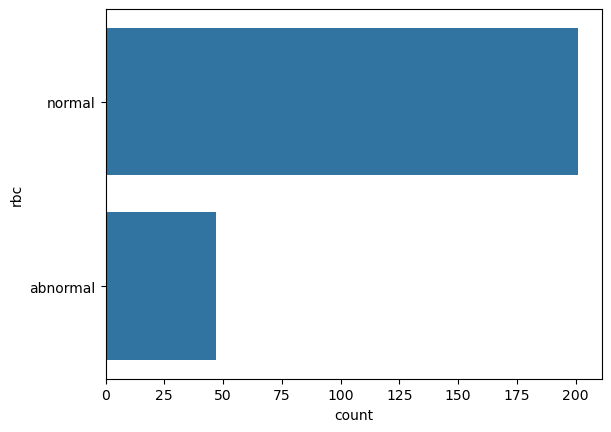

In [144]:
sns.countplot(kidney["rbc"])

<Axes: xlabel='count', ylabel='pc'>

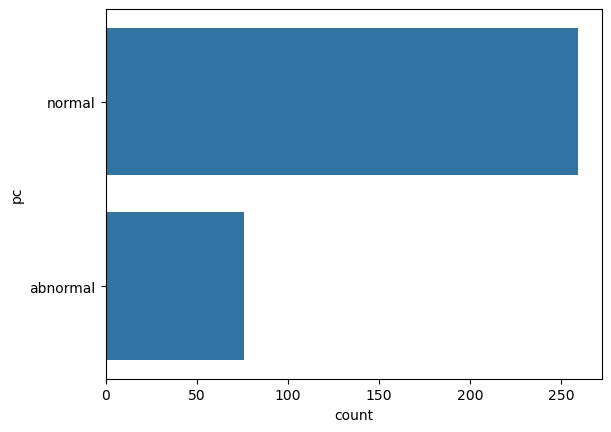

In [145]:
sns.countplot(kidney["pc"])

<Axes: xlabel='count', ylabel='pcc'>

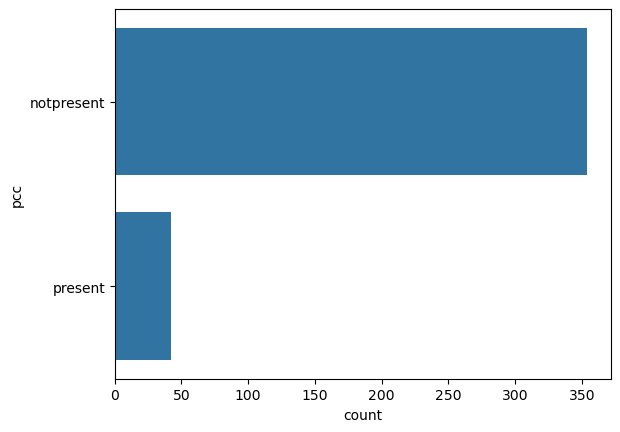

In [146]:
sns.countplot(kidney["pcc"])

<Axes: xlabel='count', ylabel='pcv'>

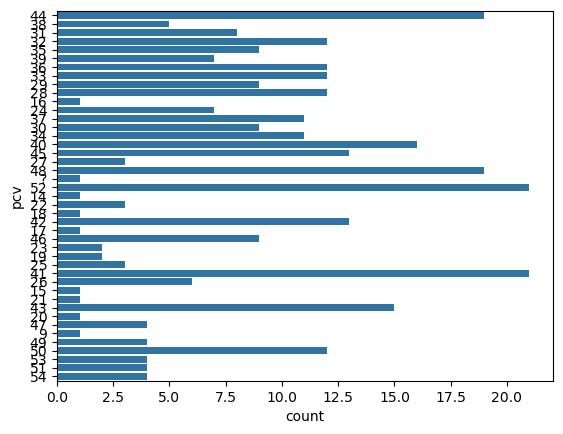

In [147]:
sns.countplot(kidney["pcv"])
#the datatype is wrong in dataset

<Axes: xlabel='count', ylabel='wc'>

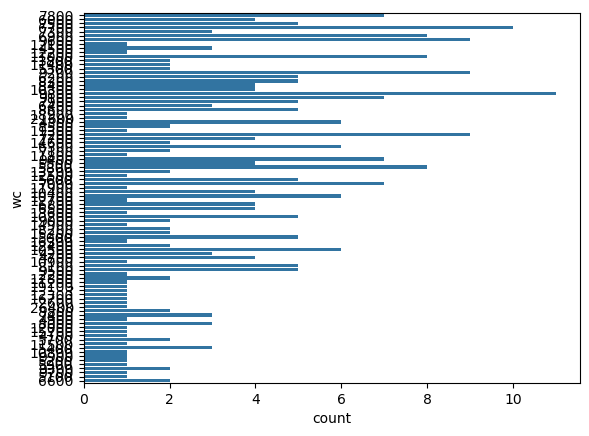

In [148]:
sns.countplot(kidney["wc"])
#the datatype is wrong in dataset

<Axes: xlabel='count', ylabel='rc'>

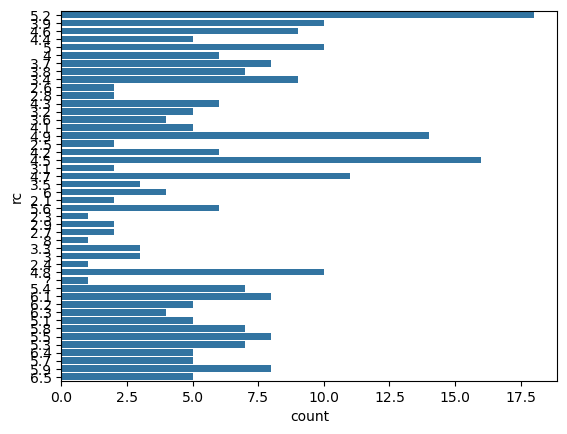

In [149]:
sns.countplot(kidney["rc"])
#the datatype is wrong in dataset

<Axes: xlabel='count', ylabel='htn'>

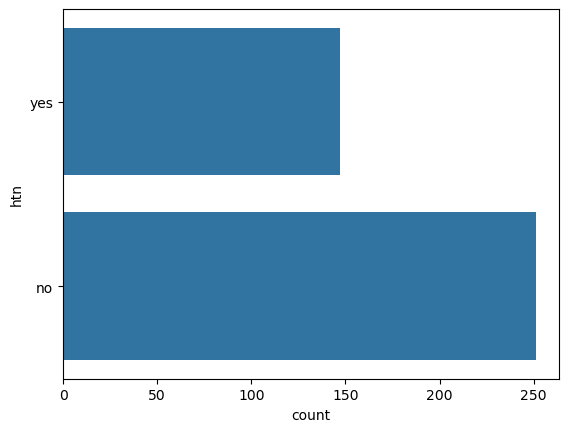

In [150]:
sns.countplot(kidney["htn"])

<Axes: xlabel='count', ylabel='dm'>

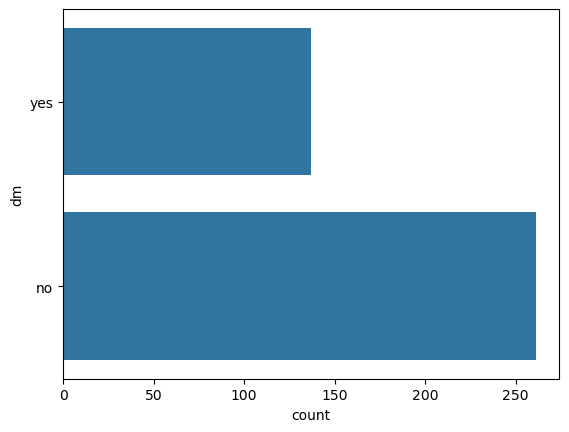

In [151]:
sns.countplot(kidney["dm"])

<Axes: xlabel='count', ylabel='cad'>

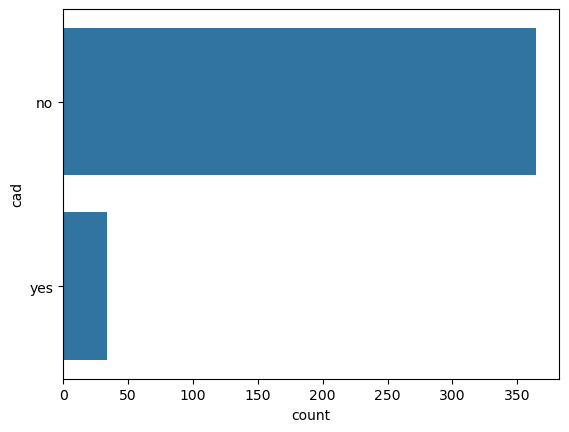

In [152]:
sns.countplot(kidney["cad"])

<Axes: xlabel='count', ylabel='appet'>

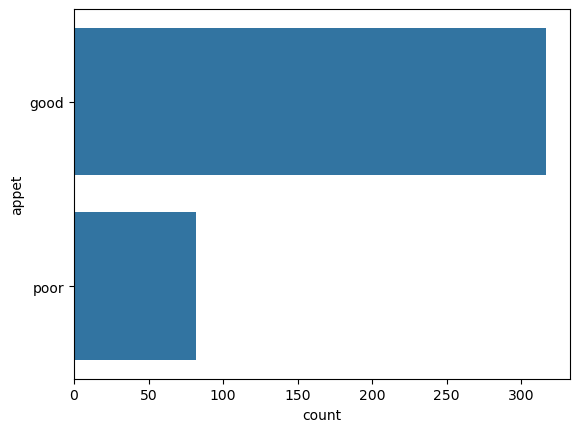

In [153]:
 sns.countplot(kidney["appet"])

<Axes: xlabel='count', ylabel='pe'>

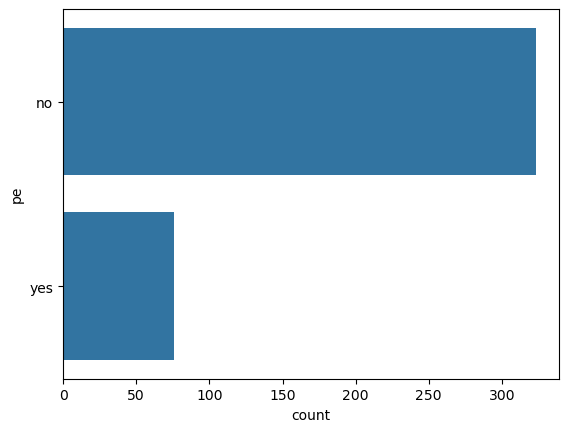

In [154]:
sns.countplot(kidney["pe"])

<Axes: xlabel='count', ylabel='ane'>

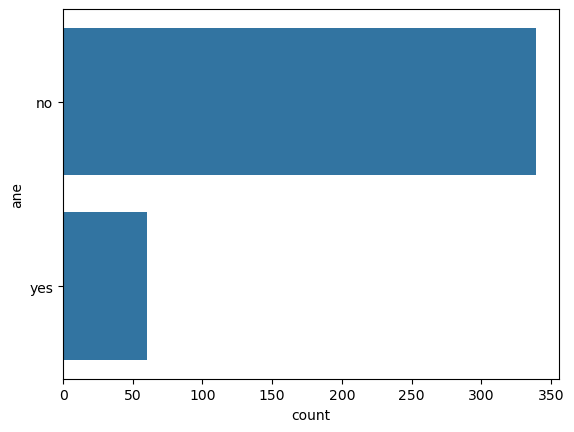

In [155]:
sns.countplot(kidney["ane"])

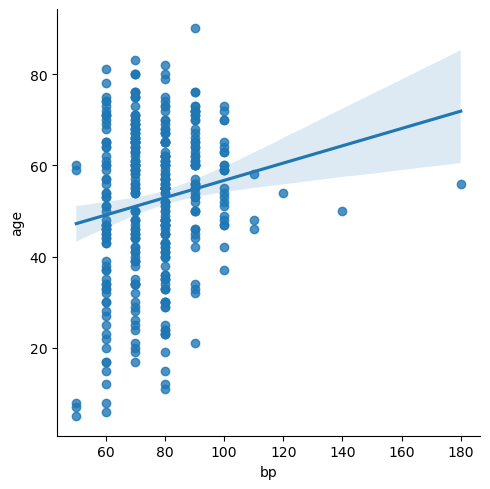

In [156]:
#bivariant analysis
sns.lmplot(data=kidney,x="bp",y="age")
#outlier present ,linear, bp more ranging from 60-80

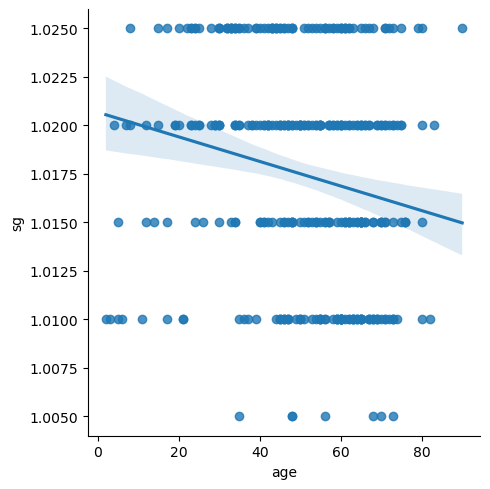

In [157]:
sns.lmplot(data=kidney,x="age",y="sg")
#negative correlation suggests that age may be a factor influencing specific gravity.

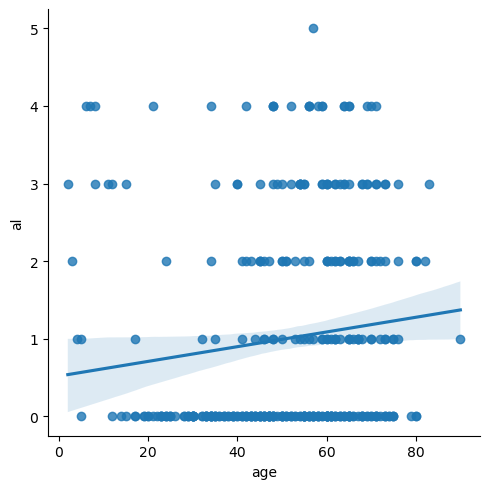

In [158]:
sns.lmplot(data=kidney,x="age",y="al")
#weak positive correlation suggests that age might be a minor factor influencing albumin, but it's not a strong predictor.

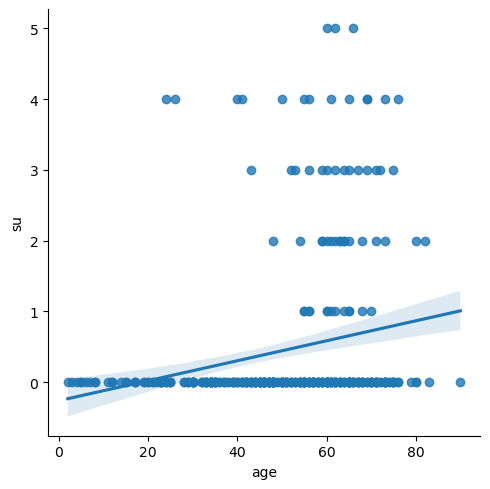

In [159]:
sns.lmplot(data=kidney,x="age",y="su")
#The weak positive correlation suggests that age might be a minor factor influencing sugar, but it's not a strong predictor.

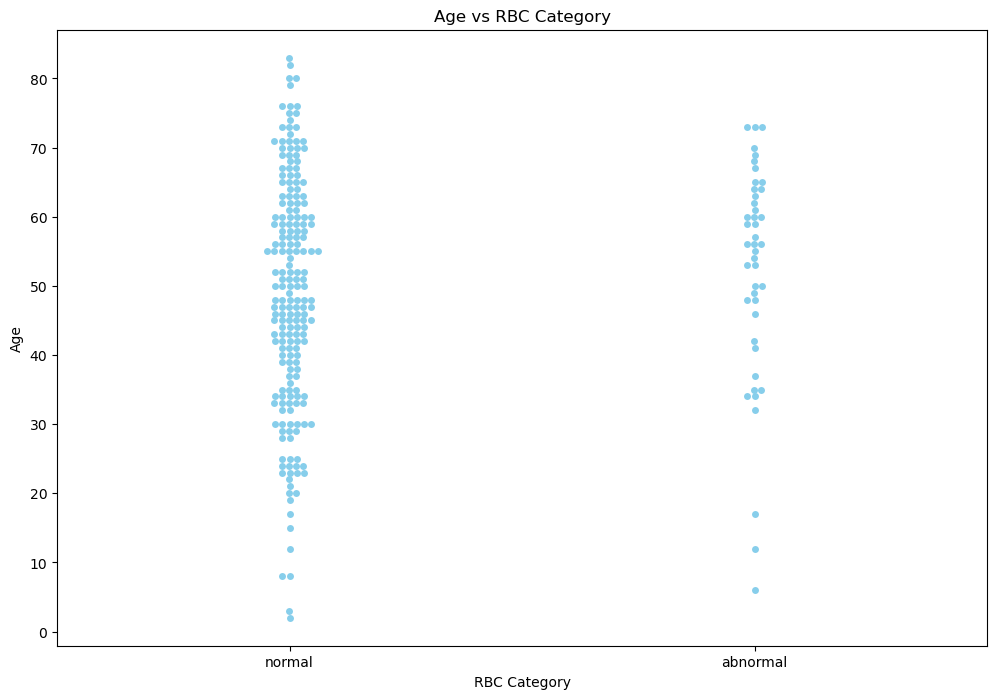

In [160]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='rbc', y='age', data=kidney, color='skyblue')
plt.title('Age vs RBC Category')
plt.xlabel('RBC Category')
plt.ylabel('Age')
plt.show()
#The overlapping distributions suggest that age alone is not a good predictor of whether an individual will have a normal or abnormal RBC category. Other factors are likely more influential.

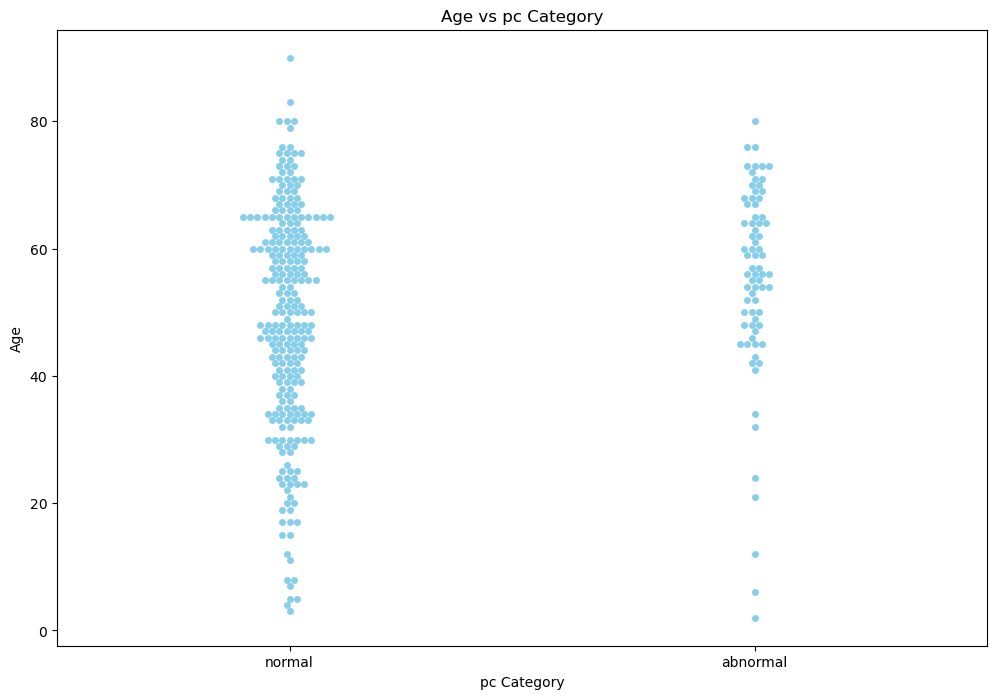

In [161]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='pc', y='age', data=kidney, color='skyblue')
plt.title('Age vs pc Category')
plt.xlabel('pc Category')
plt.ylabel('Age')
plt.show()
#not a good predictor of whether an individual will have a normal or abnormal "pc" category. 

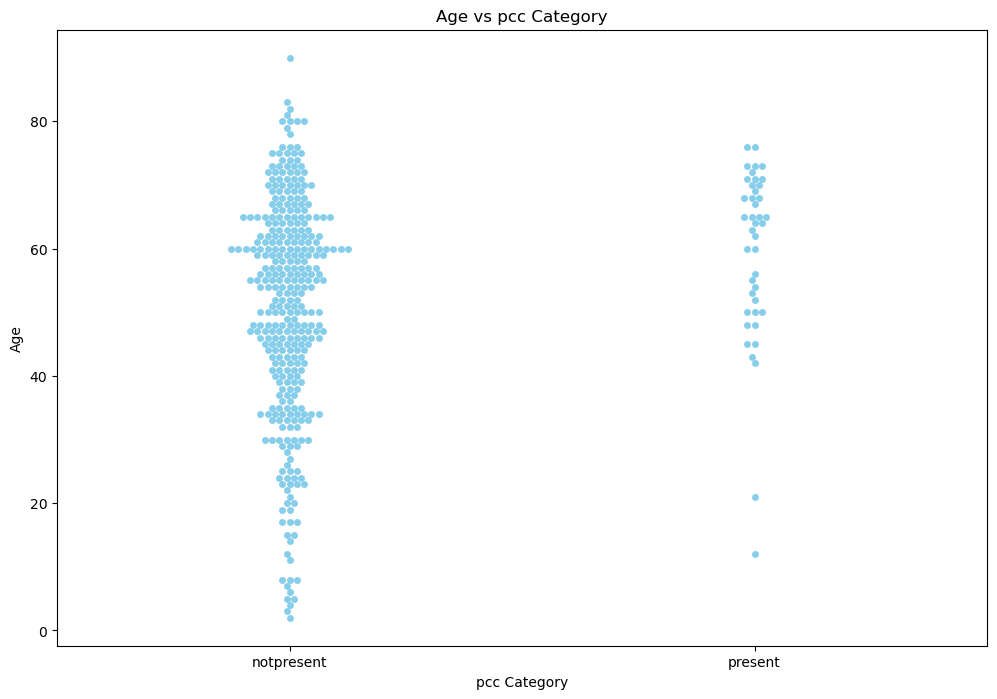

In [162]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='pcc', y='age', data=kidney, color='skyblue')
plt.title('Age vs pcc Category')
plt.xlabel('pcc Category')
plt.ylabel('Age')
plt.show()
#age alone is not a good predictor of whether an individual will have "pcc" present or not.

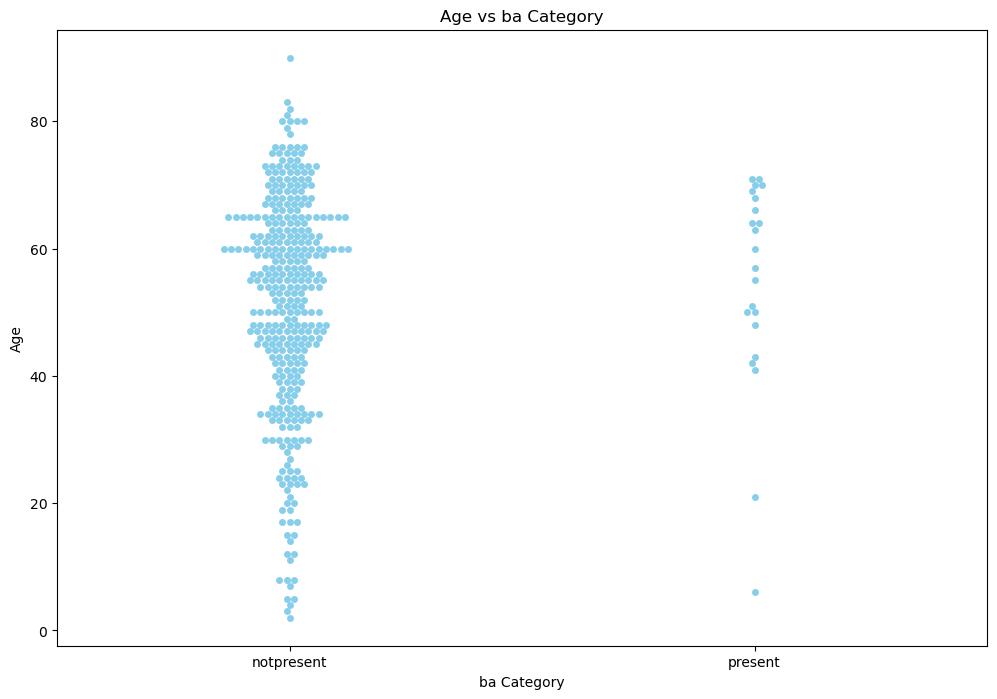

In [163]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='ba', y='age', data=kidney, color='skyblue')
plt.title('Age vs ba Category')
plt.xlabel('ba Category')
plt.ylabel('Age')
plt.show()
#age alone is not a good predictor of whether an individual will have "ba" present or not.

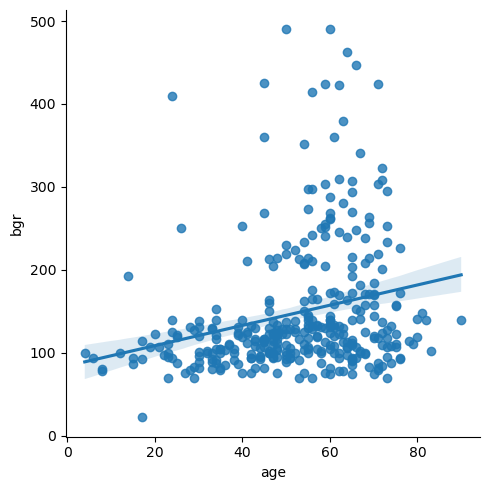

In [164]:
sns.lmplot(data=kidney,x="age",y="bgr")
#The weak positive correlation suggests that age might be a minor factor influencing bgr, but it's not a strong predictor.

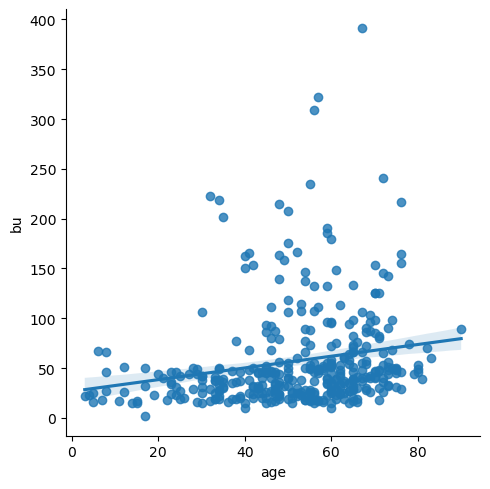

In [165]:
sns.lmplot(data=kidney,x="age",y="bu")
#weak positive correlation suggests that age might be a minor factor influencing bu, but it's not a strong predictor

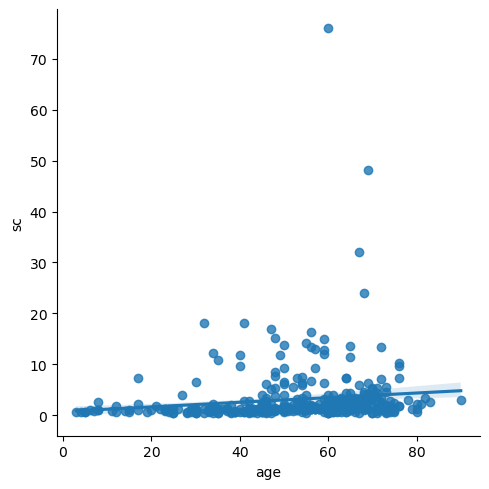

In [166]:
sns.lmplot(data=kidney,x="age",y="sc")

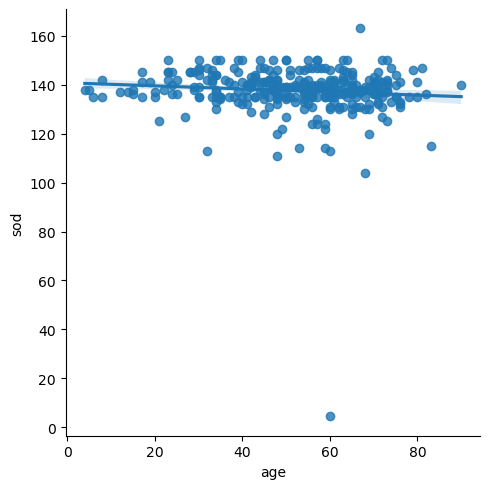

In [167]:
sns.lmplot(data=kidney,x="age",y="sod")

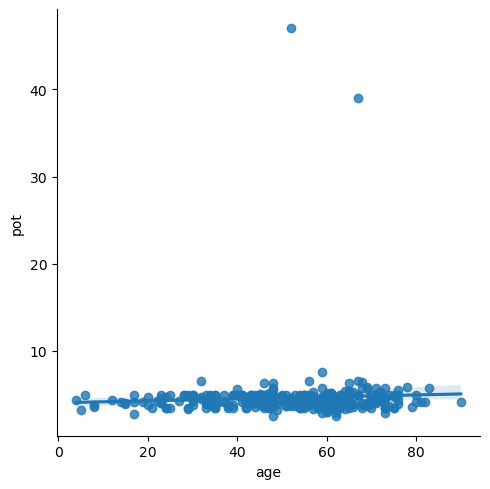

In [168]:
sns.lmplot(data=kidney,x="age",y="pot")

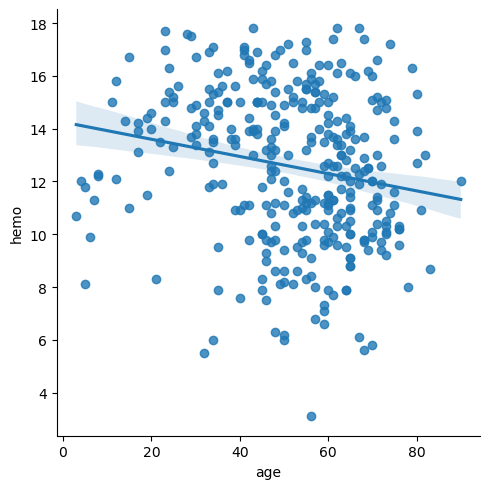

In [169]:
sns.lmplot(data=kidney,x="age",y="hemo")

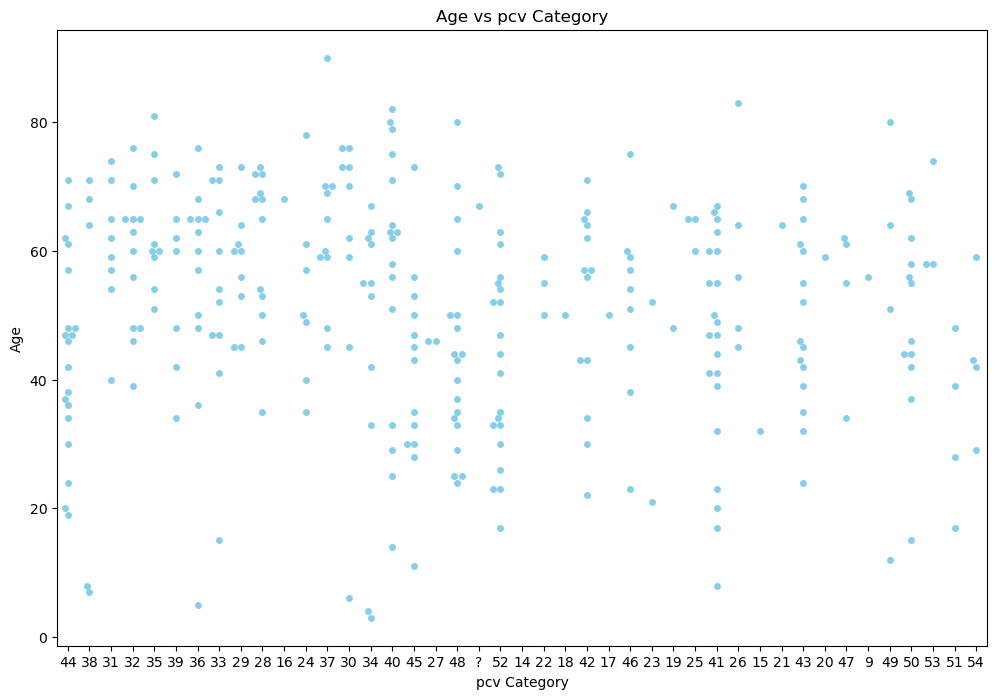

In [170]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='pcv', y='age', data=kidney, color='skyblue')
plt.title('Age vs pcv Category')
plt.xlabel('pcv Category')
plt.ylabel('Age')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.3% of the points cann

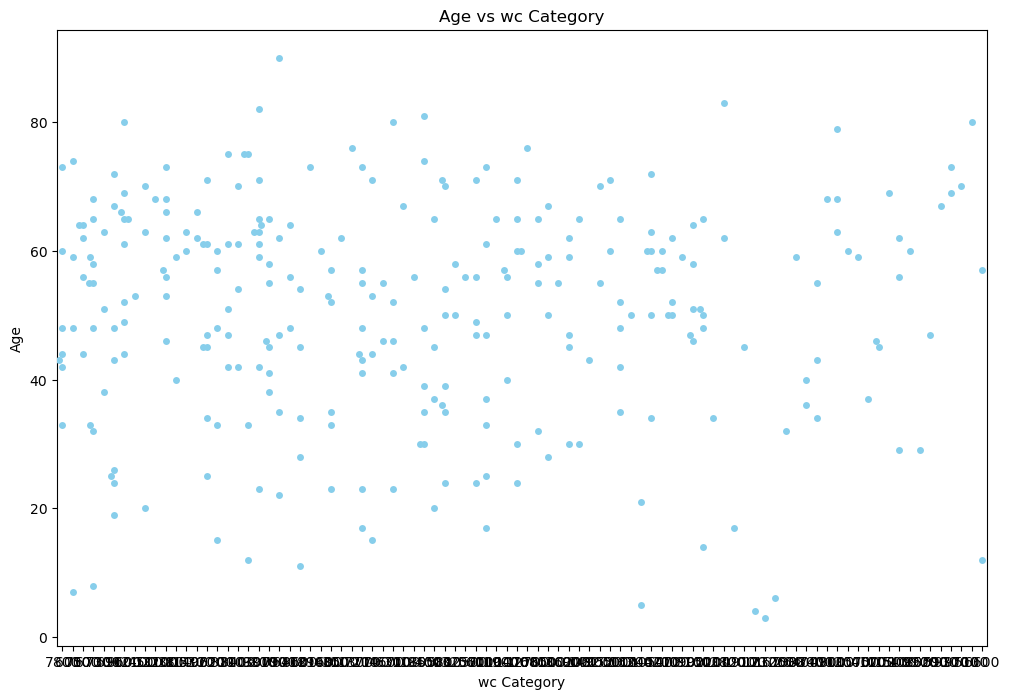

In [171]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='wc', y='age', data=kidney, color='skyblue')
plt.title('Age vs wc Category')
plt.xlabel('wc Category')
plt.ylabel('Age')
plt.show()

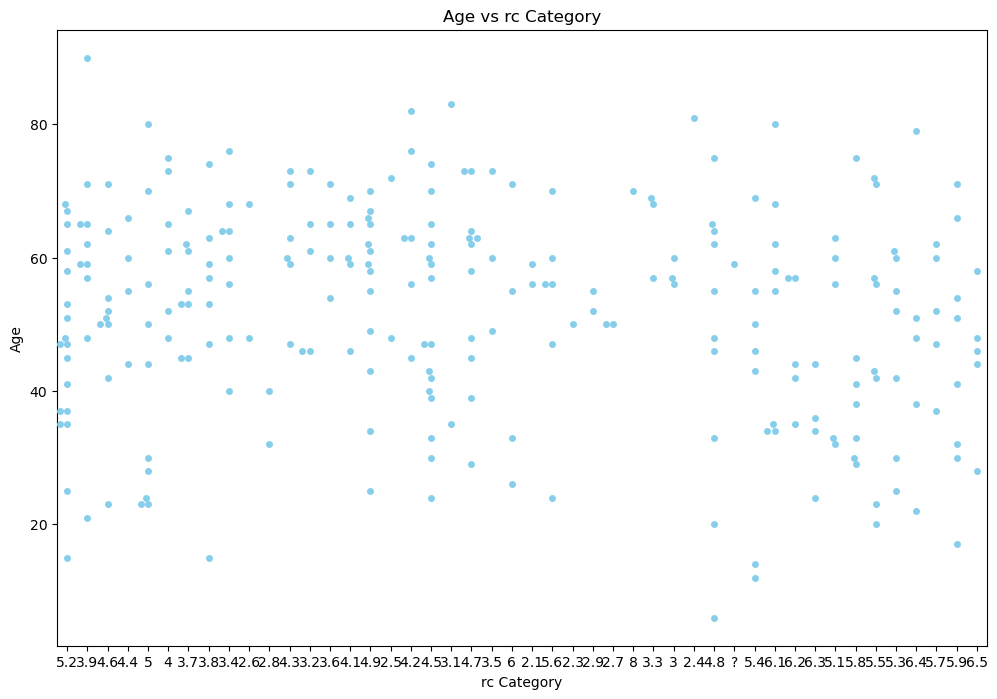

In [172]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='rc', y='age', data=kidney, color='skyblue')
plt.title('Age vs rc Category')
plt.xlabel('rc Category')
plt.ylabel('Age')
plt.show()

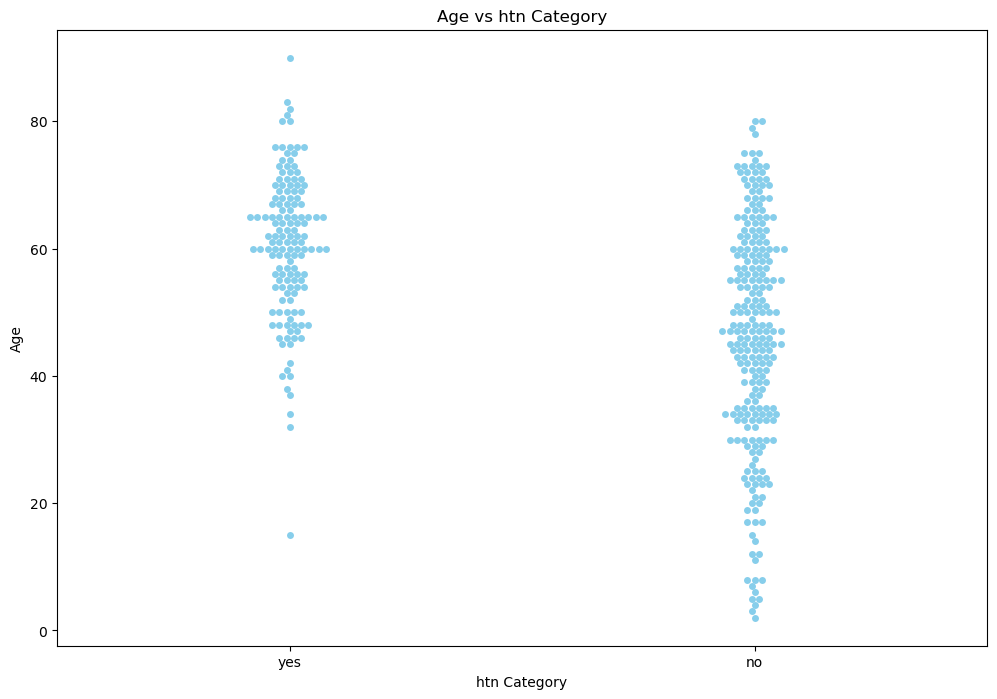

In [173]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='htn', y='age', data=kidney, color='skyblue')
plt.title('Age vs htn Category')
plt.xlabel('htn Category')
plt.ylabel('Age')
plt.show()
#slightly individuals with hypertension ("yes" category) to be older on average compared to individuals without hypertension ("no" category).

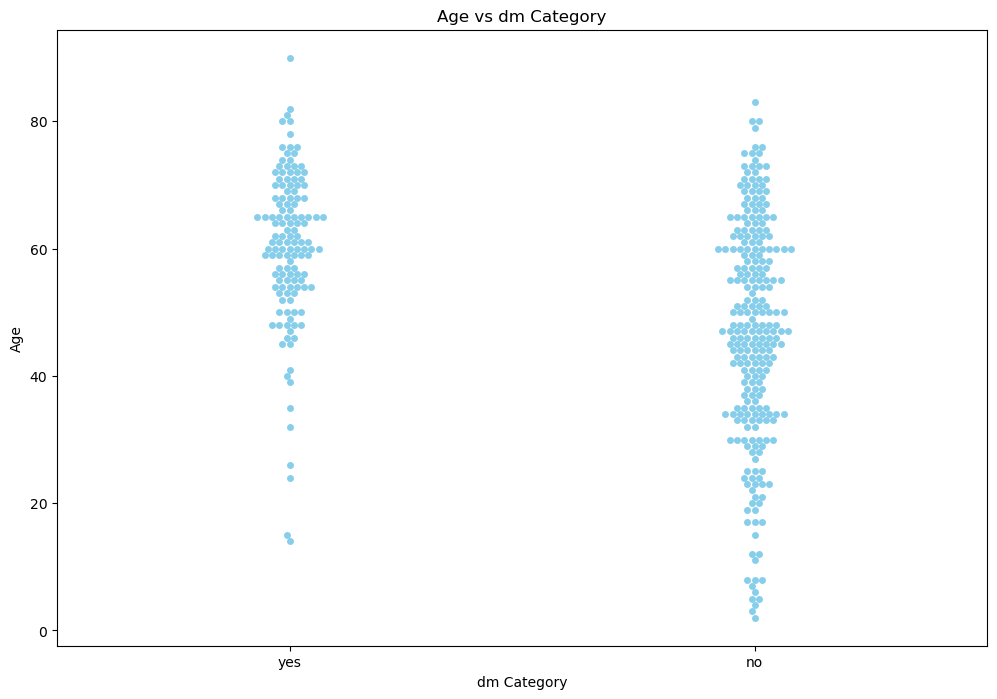

In [174]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='dm', y='age', data=kidney, color='skyblue')
plt.title('Age vs dm Category')
plt.xlabel('dm Category')
plt.ylabel('Age')
plt.show()
# individuals with "yes" category to be older on average compared to individuals with"no" category

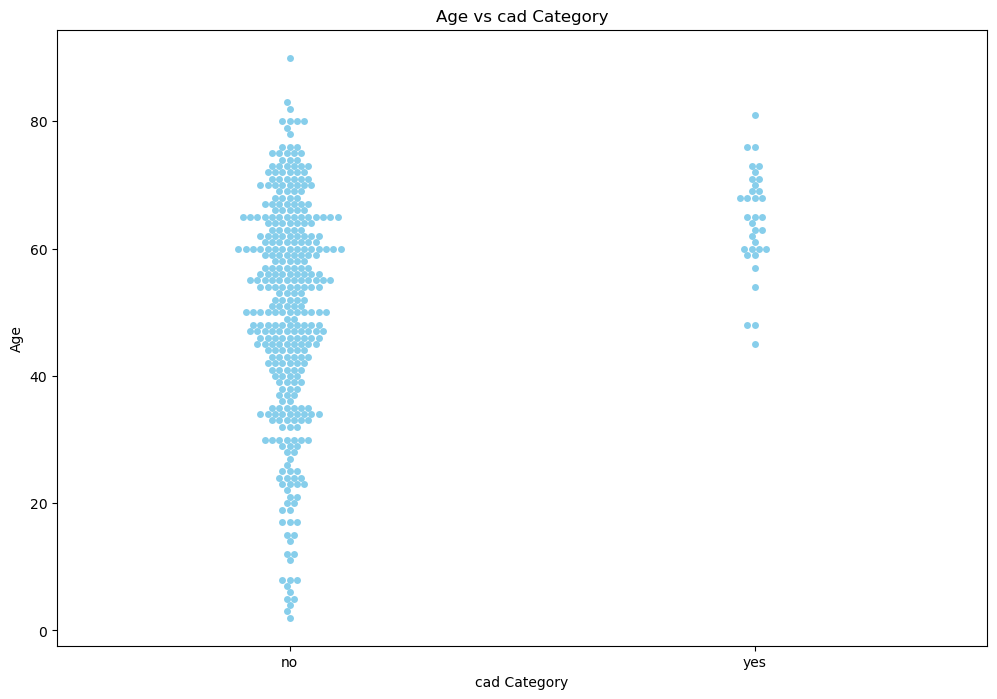

In [175]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='cad', y='age', data=kidney, color='skyblue')
plt.title('Age vs cad Category')
plt.xlabel('cad Category')
plt.ylabel('Age')
plt.show()
#slight tendency for individuals with coronary artery disease ("yes" category) to be older on average compared to individuals without coronary artery disease ("no" category)

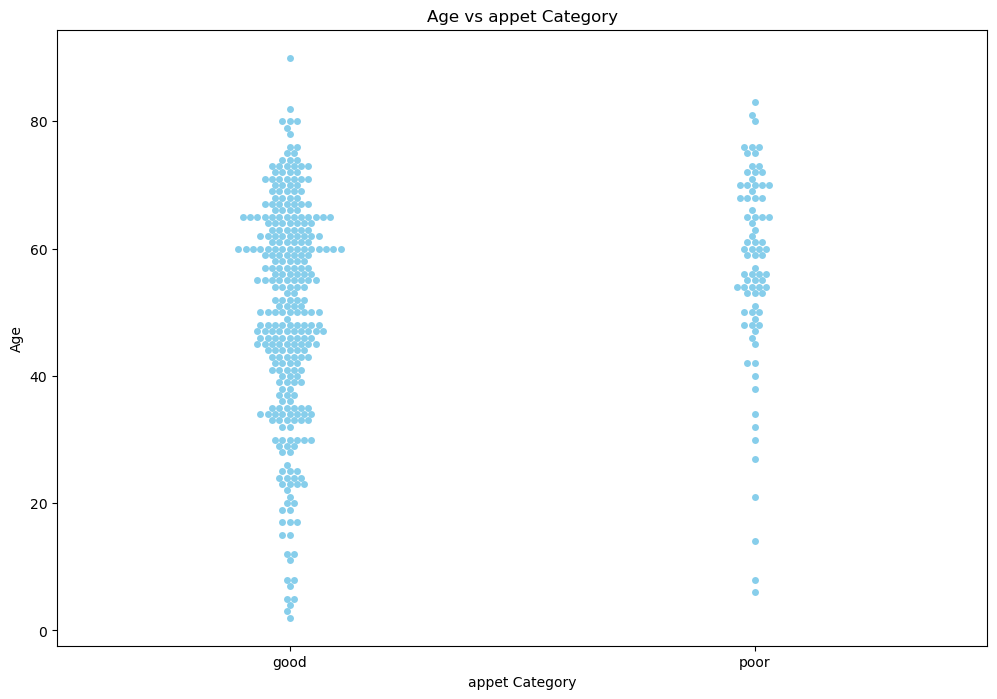

In [176]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='appet', y='age', data=kidney, color='skyblue')
plt.title('Age vs appet Category')
plt.xlabel('appet Category')
plt.ylabel('Age')
plt.show()

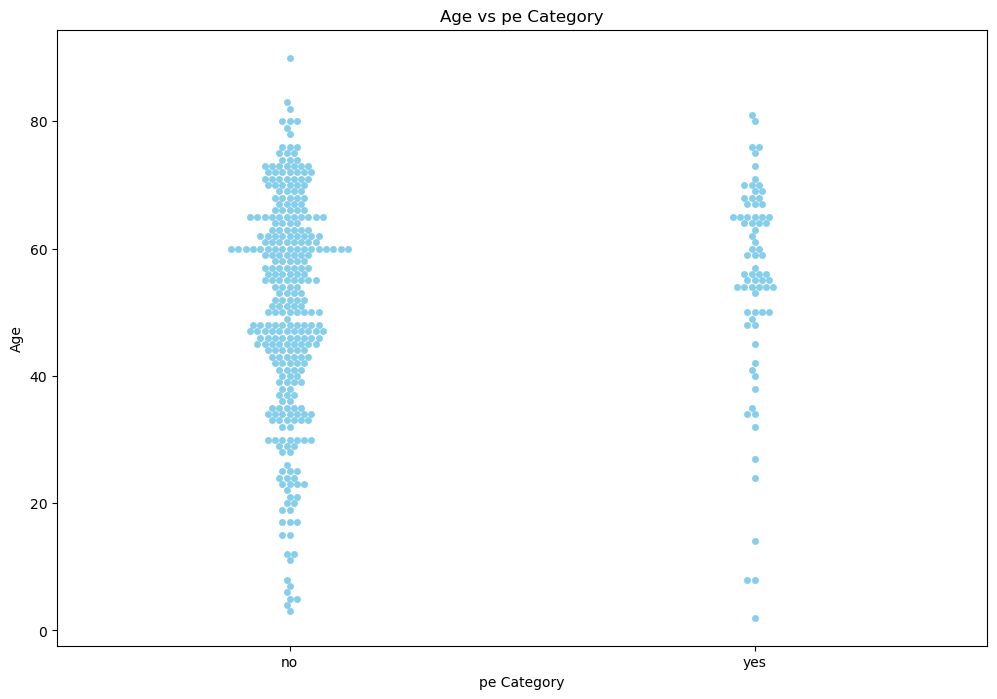

In [177]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='pe', y='age', data=kidney, color='skyblue')
plt.title('Age vs pe Category')
plt.xlabel('pe Category')
plt.ylabel('Age')
plt.show()

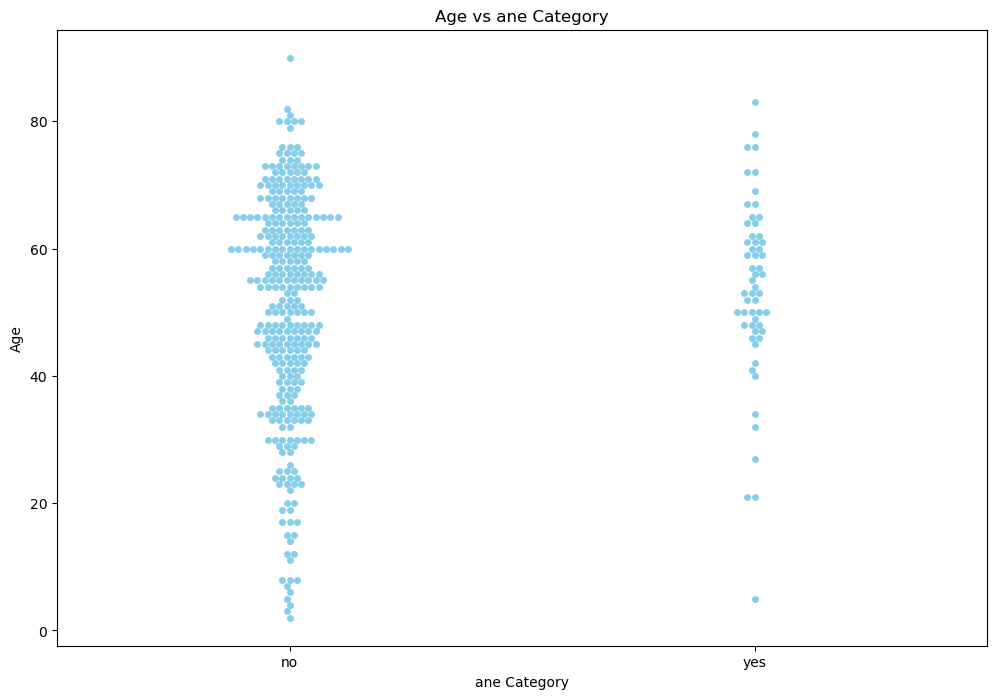

In [178]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='ane', y='age', data=kidney, color='skyblue')
plt.title('Age vs ane Category')
plt.xlabel('ane Category')
plt.ylabel('Age')
plt.show()

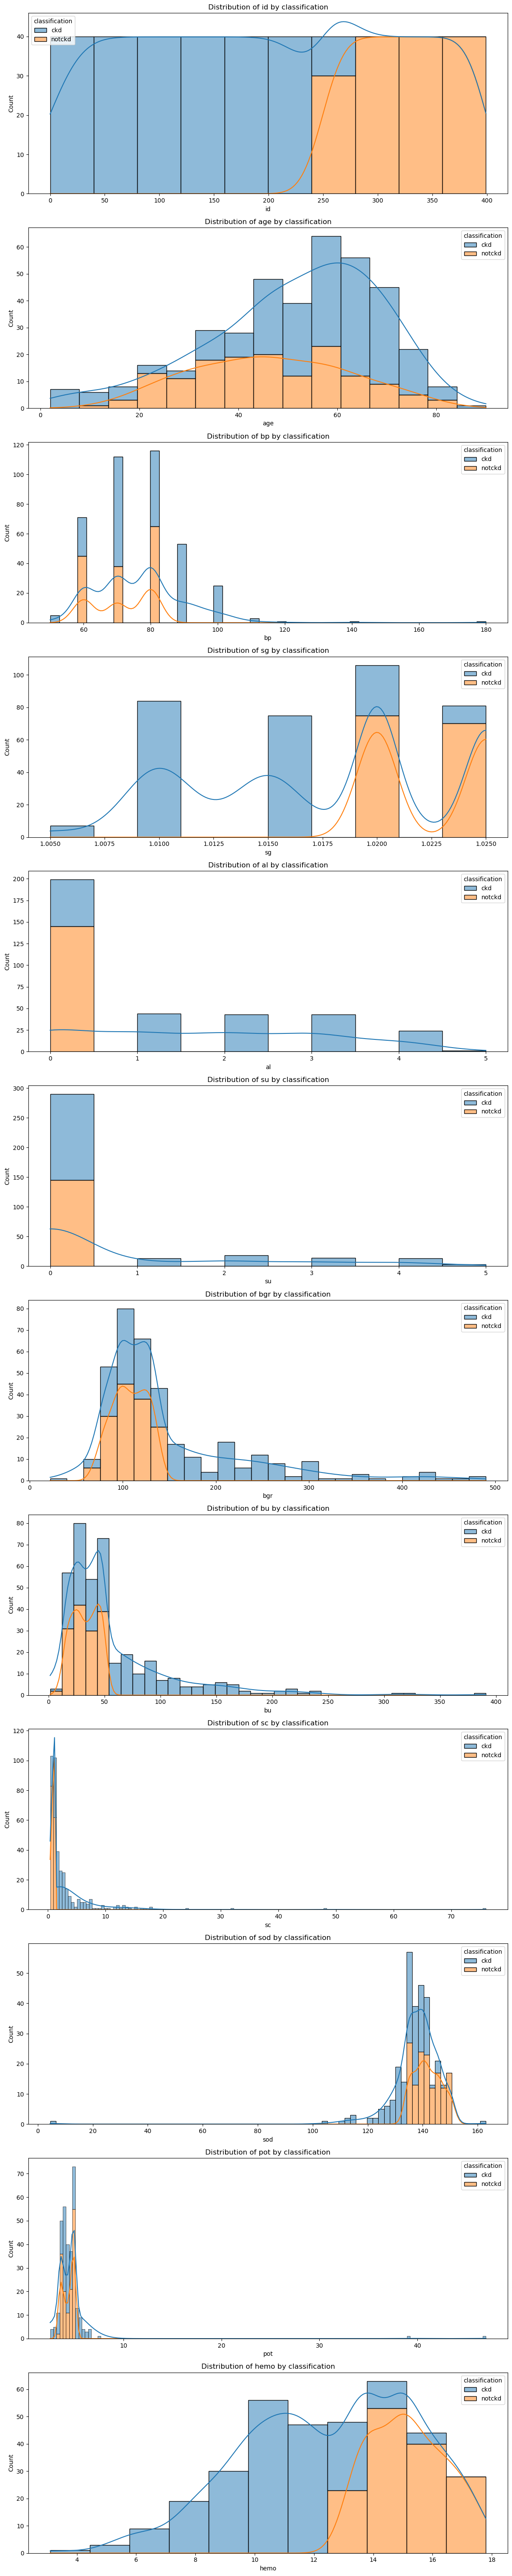

In [179]:
#bivariant analysis with target columns vs other numericcolumns
categorical_col = 'classification'  
numeric_columns = kidney.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(12, 5 * len(numeric_columns)))

# Loop through numerical columns and plot histograms
for i, col in enumerate(numeric_columns):
    sns.histplot(data=kidney, x=col, hue=categorical_col, multiple='stack', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by {categorical_col}')

plt.tight_layout()
plt.show()



insights
*Older individuals are more likely to have ckd.
*The plot suggests that (blood pressure is a potential risk factor) for chronic kidney disease. Individuals with higher blood pressure are more likely to have ckd.
*The plot suggests that (specific gravity might be an indicator of chronic kidney disease.) Individuals with lower specific gravity values (around 1.010) are more likely to have ckd.
*The plot suggests that (albumin might be a strong indicator of chronic kidney disease). Individuals with ckd have a higher likelihood of having albumin levels above 0 compared to individuals without ckd
*The plot suggests that (sugar might be a strong indicator of chronic kidney disease.) Individuals with ckd have a higher likelihood of having sugar levels above 0 compared to individuals without ckd.
*The plot suggests that (blood glucose random might be an indicator of chronic kidney disease.) Individuals with ckd tend to have a wider range of bgr values, including higher values, compared to individuals without ckd.
*The plot suggests that (blood urea might be a strong indicator of chronic kidney disease). Individuals with ckd tend to have a wider range of bu values, including higher values, compared to individuals without ckd.
*The plot suggests that (serum creatinine is a strong indicator of chronic kidney disease.) Individuals with ckd tend to have a wider range of sc values, including much higher values, compared to individuals without ckd.
*The plot suggests that (sodium might be a weak indicator of chronic kidney disease.) Individuals with ckd tend to have a wider range of sodium values, including a small group with slightly lower sodium levels (around 130), compared to individuals without ckd. However, the majority of individuals in both groups have similar sodium levels around 135-140.
*The plot suggests that (potassium is a strong indicator of chronic kidney disease.) Individuals with ckd tend to have a wider range of potassium values, including much higher values, compared to individuals without ckd.
hemo is essential

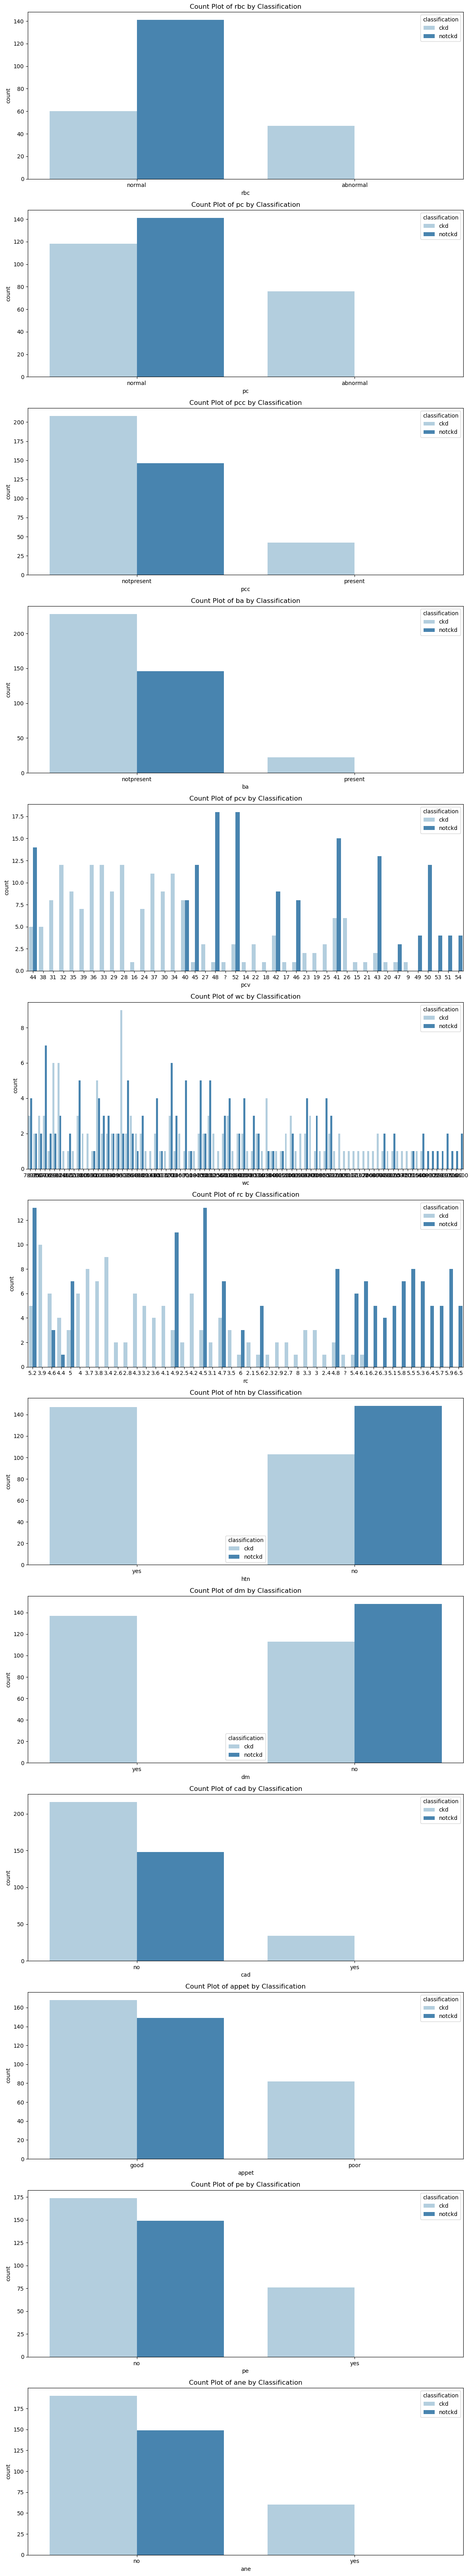

In [180]:
# #bivariant analysis with target columns vs other categorical columns
categorical_columns = kidney.select_dtypes(include=['object', 'category']).columns
categorical_columns = [col for col in categorical_columns if col != 'classification']

# Creating subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), figsize=(12, 5 * len(categorical_columns)))

# Loop through categorical columns and plot count plots
for i, col in enumerate(categorical_columns):
    sns.countplot(x=kidney[col], hue=kidney['classification'], ax=axes[i], palette='Blues')
    axes[i].set_title(f'Count Plot of {col} by Classification')

plt.tight_layout()
plt.show()
#the count plot shows that ***"abnormal" rbc is strongly associated with the presence of chronic kidney disease.**** "Normal" rbc is more common in individuals without ckd, but it is also present in a significant number of individuals with ckd.
#all the parameter listed plays important role for finding the disease





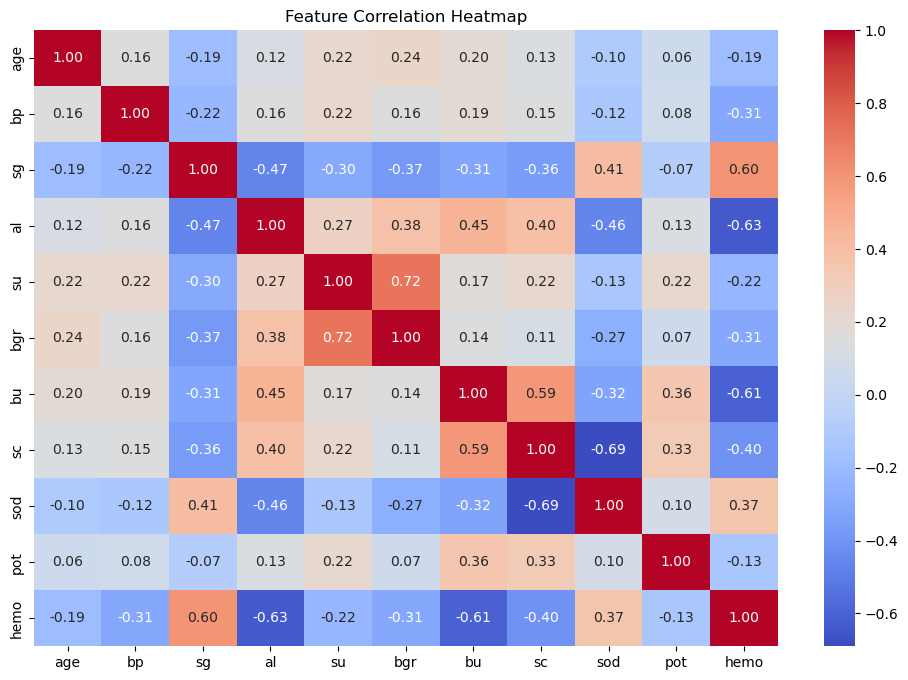

In [181]:
#multivariant analysis
cols=["id", "rbc","pc","pcc","ba", "pcv","wc","rc","htn","dm","cad","appet","pe","ane","classification"]
heat_column=kidney.drop(columns=cols,errors="ignore")
corr_matrix =heat_column.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**insights***
1.specifc gravity is 60% related to hemoglobin
2.albumin is 45%related with bu
3.bgr is 57% related to sugar
4.sc is 58% related to the bu 

In [208]:
#drop unwanted columns
kidney.drop(["id","rbc","sod"],axis=1,inplace=True)

In [209]:
# Convert columns to numeric
kidney[['pcv', 'wc', 'rc']] = kidney[['pcv', 'wc', 'rc']].apply(pd.to_numeric, errors='coerce')

In [210]:
# checking the datatypes
kidney.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [211]:
#missing value treatment
kidney.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [212]:
(kidney.isnull().sum()/len(kidney))*100

age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
pot               22.00
hemo              13.00
pcv               17.75
wc                26.50
rc                32.75
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

<Axes: >

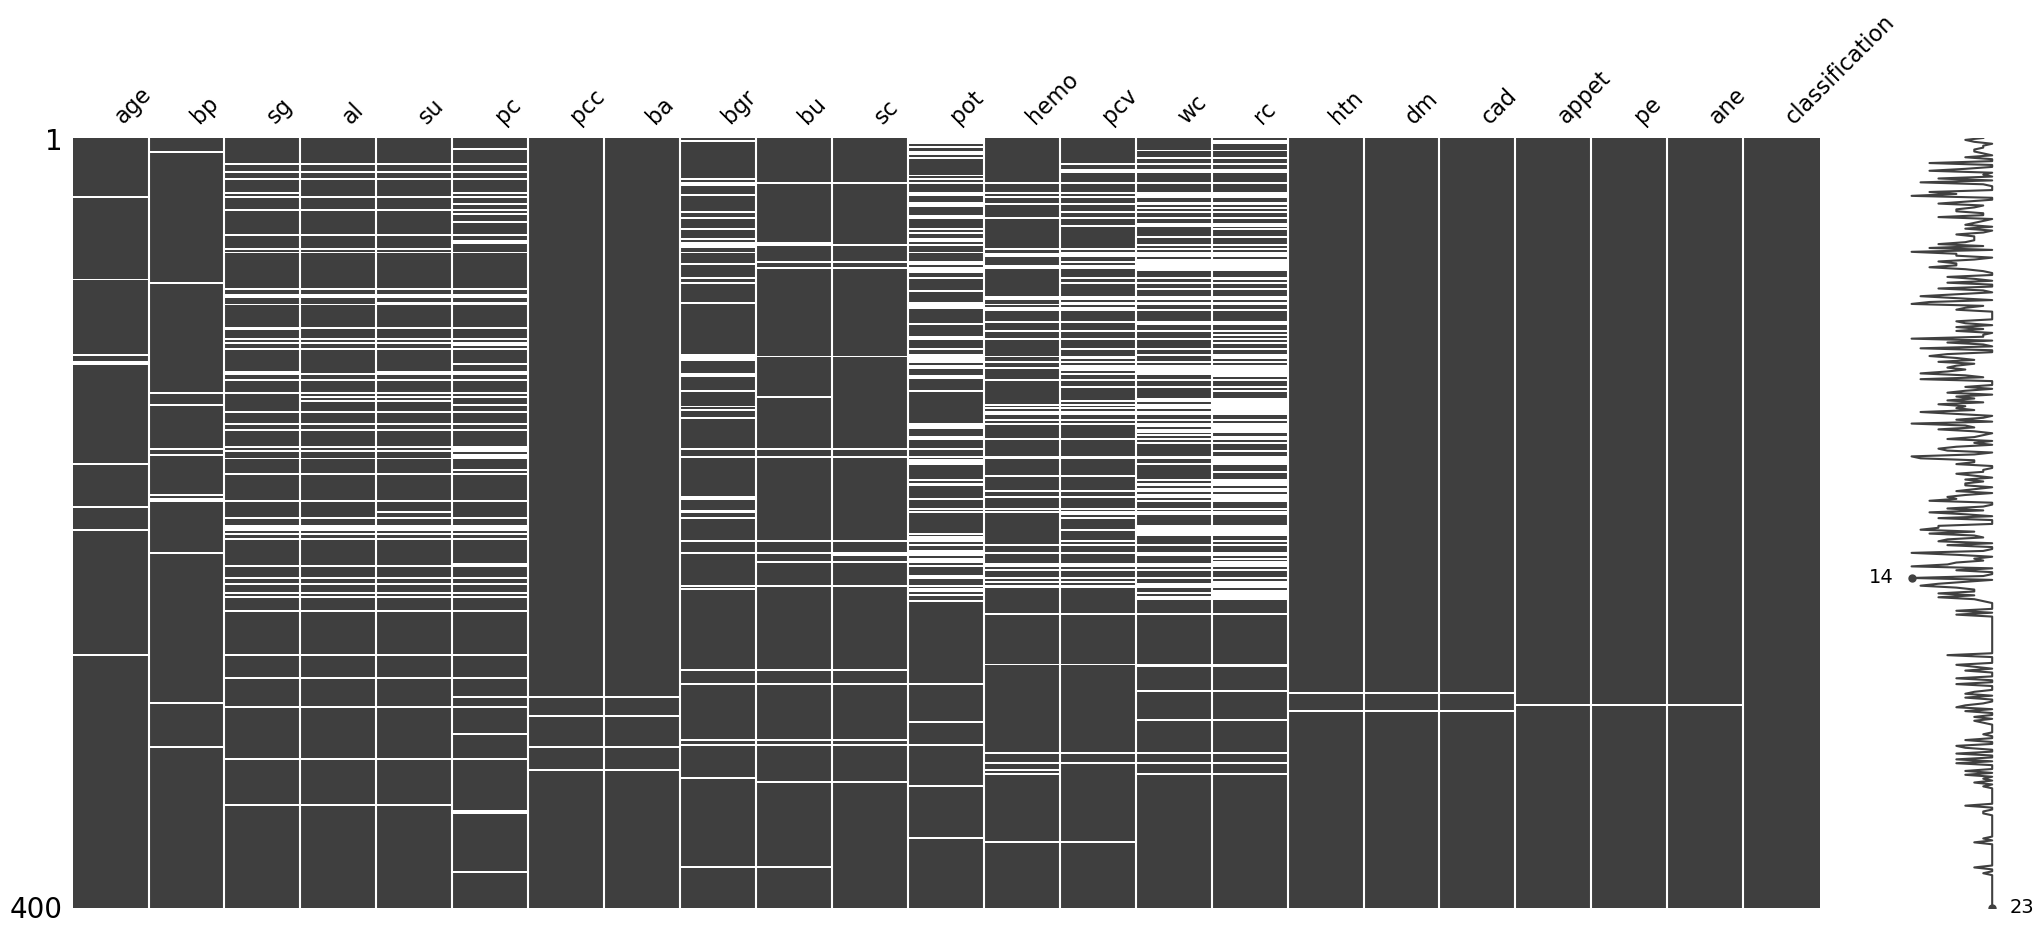

In [213]:
import missingno
missingno.matrix(kidney)

In [214]:
(kidney.isnull().sum()/len(kidney))*100

age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
pot               22.00
hemo              13.00
pcv               17.75
wc                26.50
rc                32.75
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

<Axes: >

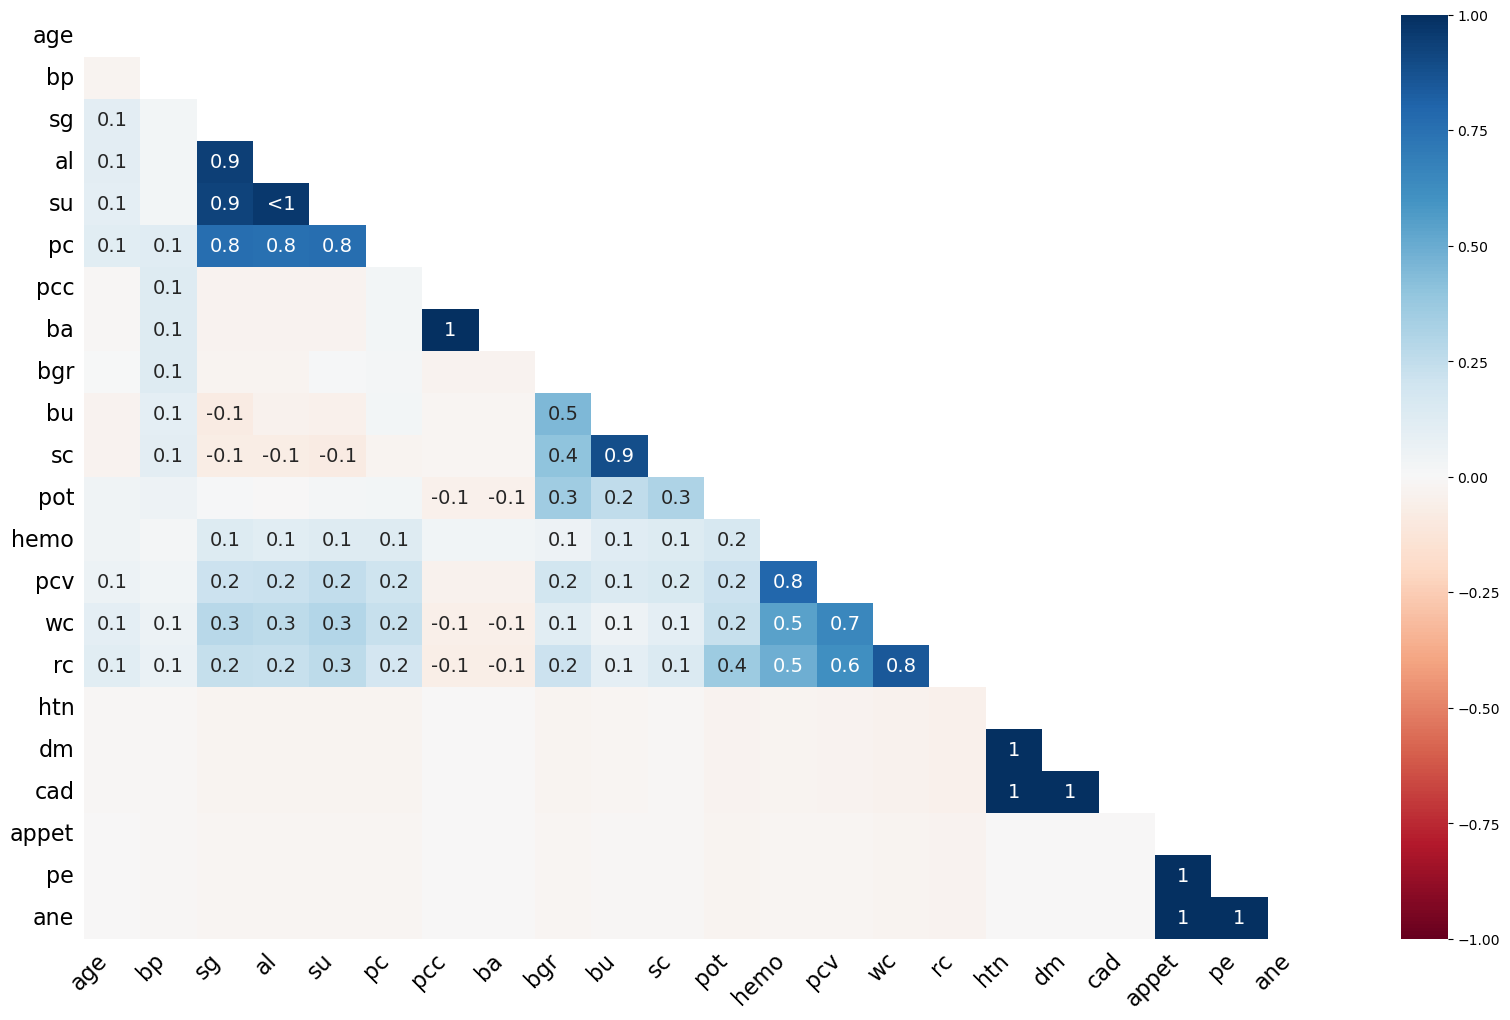

In [215]:
missingno.heatmap(kidney)

In [216]:
# Fill categorical columns using forward fill
categorical_cols = ['pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
kidney[categorical_cols] = kidney[categorical_cols].fillna(method='ffill')

# Fill numerical columns using interpolation (with fallback to ffill/bfill)
numerical_cols = ['bp', 'sg', 'al', 'bu', 'sc', 'bgr', 'hemo', 'pcv', 'wc', 'rc','su','pot',"age"]
kidney[numerical_cols] = kidney[numerical_cols].interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')


C:\Users\DELL\AppData\Local\Temp\ipykernel_22108\878554139.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  kidney[categorical_cols] = kidney[categorical_cols].fillna(method='ffill')
C:\Users\DELL\AppData\Local\Temp\ipykernel_22108\878554139.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  kidney[numerical_cols] = kidney[numerical_cols].interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')


In [217]:
kidney.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

<Axes: >

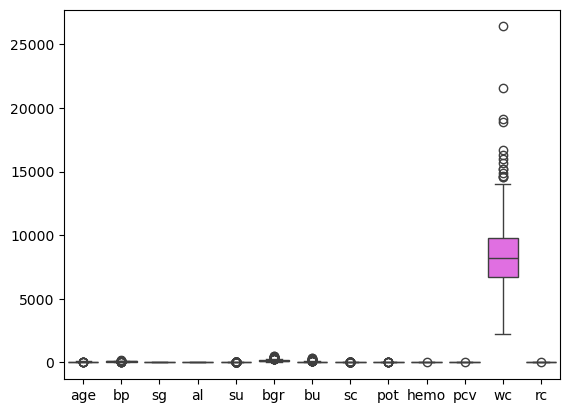

In [218]:
#checking outliers
sns.boxplot(kidney)

In [219]:
#treating outliers
q1 = kidney["wc"].quantile(0.25)
q3 = kidney["wc"].quantile(0.75)
iqr = q3 - q1

ll = q1 - 1.5*iqr
ul = q3 + 1.5*iqr

kidney= kidney[(kidney["wc"] > ll) & (kidney["wc"] < ul)]

In [220]:
kidney["wc"].skew()

0.08457026071166639

In [221]:
#remaing columns
kidney.rename(columns={
    'age': 'Age',
    'bp': 'Blood_Pressure',
    'sg': 'Specific_Gravity',
    'al': 'Albumin',
    'su': 'Sugar',
    'pc': 'Pus_Cells',
    'pcc': 'Pus_Cell_Casts',
    'ba': 'Bacteria',
    'bgr': 'Blood_Glucose_Random',
    'bu': 'Blood_Urea',
    'sc': 'Serum_Creatinine',
    'sod': 'Sodium',
    'pot': 'Potassium',
    'hemo': 'Hemoglobin',
    'pcv': 'Packed_Cell_Volume',
    'wc': 'White_Blood_Cell_Count',
    'rc': 'Red_Blood_Cell_Count',
    'htn': 'Hypertension',
    'dm': 'Diabetes_Mellitus',
    'cad': 'Coronary_Artery_Disease',
    'appet': 'Appetite',
    'pe': 'Pedal_Edema',
    'ane': 'Anemia'
}, inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_22108\1700454894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney.rename(columns={


In [222]:
kidney.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Pus_Cells', 'Pus_Cell_Casts', 'Bacteria', 'Blood_Glucose_Random',
       'Blood_Urea', 'Serum_Creatinine', 'Potassium', 'Hemoglobin',
       'Packed_Cell_Volume', 'White_Blood_Cell_Count', 'Red_Blood_Cell_Count',
       'Hypertension', 'Diabetes_Mellitus', 'Coronary_Artery_Disease',
       'Appetite', 'Pedal_Edema', 'Anemia', 'classification'],
      dtype='object')

In [223]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Pus_Cells','Pus_Cell_Casts', 'Bacteria', 
              'Hypertension', 'Diabetes_Mellitus', 'Coronary_Artery_Disease', 
              'Appetite', 'Pedal_Edema', 'Anemia']

label_encoder = LabelEncoder()

for col in label_cols:
    kidney[col] = label_encoder.fit_transform(kidney[col])


C:\Users\DELL\AppData\Local\Temp\ipykernel_22108\2163861773.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney[col] = label_encoder.fit_transform(kidney[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_22108\2163861773.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney[col] = label_encoder.fit_transform(kidney[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_22108\2163861773.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [224]:
from sklearn.preprocessing import LabelEncoder

# Convert 'ckd' -> 1 and 'notckd' -> 0
label_encoder = LabelEncoder()
kidney["classification"]=label_encoder.fit_transform(kidney["classification"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_22108\1950706715.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney["classification"]=label_encoder.fit_transform(kidney["classification"])


In [225]:
x=kidney.drop("classification",axis=1)
y=kidney["classification"]

In [226]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [227]:
x

array([[0.52272727, 0.23076923, 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [0.05681818, 0.        , 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [0.68181818, 0.23076923, 0.25      , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.11363636, 0.23076923, 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [0.17045455, 0.07692308, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.63636364, 0.23076923, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [228]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x,y , random_state=45,test_size=0.30)

In [229]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((270, 22), (116, 22), (270,), (116,))

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
LR = LogisticRegression(max_iter=10000, random_state=0)
LR.fit(X_train, y_train)
y_predict=LR.predict(X_test)
precision = precision_score(y_test, y_predict, average='binary')
recall = recall_score(y_test, y_predict, average='binary')
f1 = f1_score(y_test, y_predict, average='binary')
print(f"precision:{precision},\nrecall:{recall},\nf1score:{f1}")

precision:0.96,
recall:1.0,
f1score:0.9795918367346939


In [231]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')  
svc.fit(X_train, y_train) 
y_predict = svc.predict(X_test) 
precision = precision_score(y_test, y_predict, average='binary')
recall = recall_score(y_test, y_predict, average='binary')
f1 = f1_score(y_test, y_predict, average='binary')
print(f"precision:{precision},\nrecall:{recall},\nf1score:{f1}")

precision:0.9795918367346939,
recall:1.0,
f1score:0.9896907216494846


In [232]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the classifier
dtc = DecisionTreeClassifier(random_state=0,max_depth=2)
dtc.fit(X_train, y_train)

# Predict and evaluate
y_predict = dtc.predict(X_test)
precision = precision_score(y_test, y_predict, average='binary')
recall = recall_score(y_test, y_predict, average='binary')
f1 = f1_score(y_test, y_predict, average='binary')

print(f"Decision Tree Classifier\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")


Decision Tree Classifier
Precision: 0.94
Recall: 0.9791666666666666
F1 Score: 0.9591836734693877


In [233]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the classifier
rfc = RandomForestClassifier(random_state=0,max_depth=2)
rfc.fit(X_train, y_train)

# Predict and evaluate
y_predict = rfc.predict(X_test)
precision = precision_score(y_test, y_predict, average='binary')
recall = recall_score(y_test, y_predict, average='binary')
f1 = f1_score(y_test, y_predict, average='binary')

print(f"Random Forest Classifier\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")


Random Forest Classifier
Precision: 0.96
Recall: 1.0
F1 Score: 0.9795918367346939


In [234]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict and evaluate
y_predict = knn.predict(X_test)
precision = precision_score(y_test, y_predict, average='binary')
recall = recall_score(y_test, y_predict, average='binary')
f1 = f1_score(y_test, y_predict, average='binary')

print(f"K-Nearest Neighbors\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")


K-Nearest Neighbors
Precision: 0.9411764705882353
Recall: 1.0
F1 Score: 0.9696969696969697


In [235]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict and evaluate
y_predict = nb.predict(X_test)
precision = precision_score(y_test, y_predict, average='binary')
recall = recall_score(y_test, y_predict, average='binary')
f1 = f1_score(y_test, y_predict, average='binary')

print(f"Naive Bayes Classifier\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")


Naive Bayes Classifier
Precision: 0.9411764705882353
Recall: 1.0
F1 Score: 0.9696969696969697
